In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

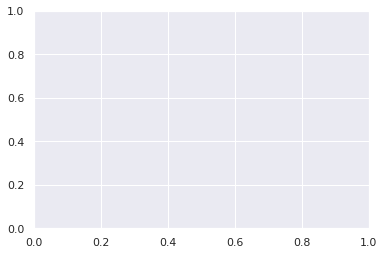

In [3]:
# 1st method 
fig = plt.figure() #creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

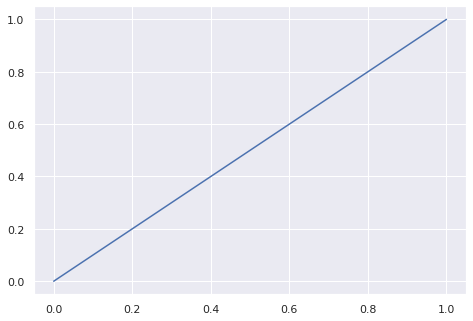

In [4]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

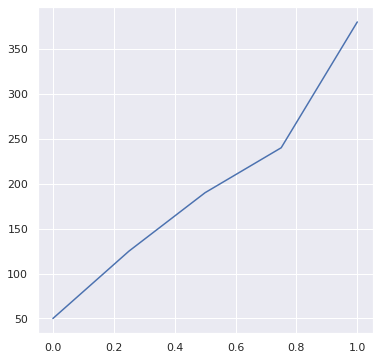

In [5]:
# 3rd method
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,[50,125,190,240,380])
plt.show()

## Matplotlib workflow example

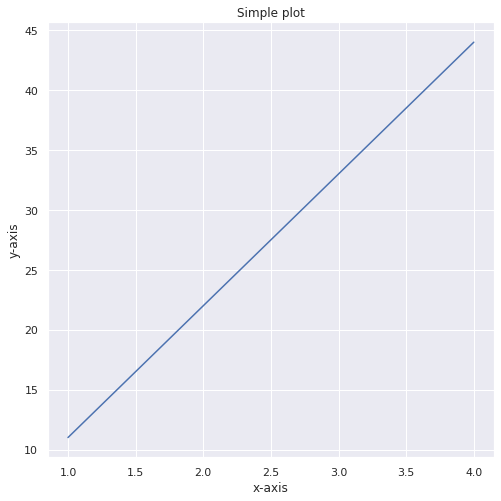

In [6]:
# 1. Prepare data
x = [1,2,3,4]
y = [11, 22 ,33 , 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(8,8))

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title= "Simple plot", xlabel="x-axis", ylabel="y-axis")

# 5.save fig
fig.savefig("../images/simple-plt.png")

## Making figures with numpy arrays

### Targets : 
 * Line plot
 * Scatter plot
 * Bar plot
 * Histogram
 * Subplots

#### Line Plot

In [7]:
# Create data
x = np.linspace(0,10,100)

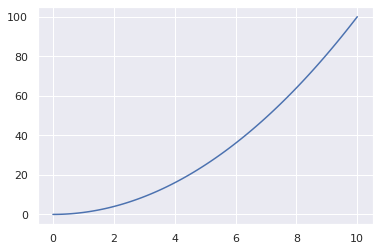

In [8]:
# Plot data
fig, ax = plt.subplots()
ax.plot(x, x**2)

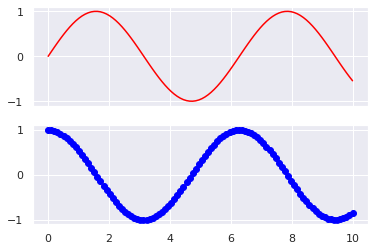

In [9]:
# Use data to make scatter plot
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(x,np.sin(x),c="red")
ax[1].scatter(x,np.cos(x),c="blue")

#### Bar chart

[Text(0.5, 0, 'name'), Text(0, 0.5, 'price'), Text(0.5, 1.0, 'Books price')]

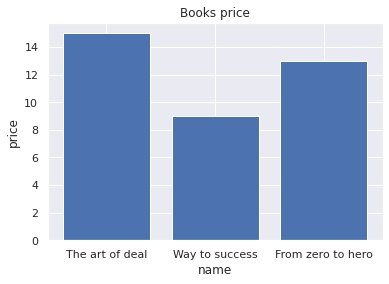

In [10]:
# Make a plot from dictionary
books_prices = {"The art of deal" : 15 , "Way to success" : 9, "From zero to hero" : 13}
fig, ax = plt.subplots()
ax.bar(books_prices.keys(), books_prices.values())
ax.set(xlabel="name", ylabel="price", title="Books price")

<BarContainer object of 3 artists>

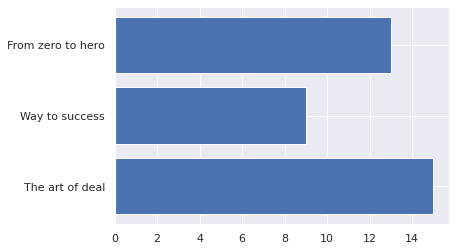

In [11]:
fig, ax = plt.subplots()
ax.barh(list(books_prices.keys()),list(books_prices.values()) )

#### Histogram

(array([  1.,  10.,  40., 101., 226., 256., 227., 102.,  31.,   6.]),
 array([-3.72532029, -3.04529115, -2.365262  , -1.68523285, -1.00520371,
        -0.32517456,  0.35485458,  1.03488373,  1.71491288,  2.39494202,
         3.07497117]),
 <BarContainer object of 10 artists>)

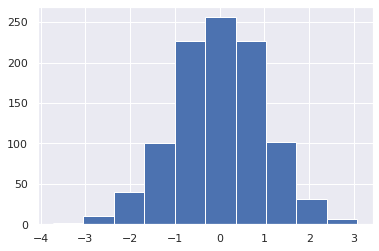

In [12]:
# Make data
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)

## Two options for subplots

(array([ 2.,  2.,  4., 11., 17., 19., 21., 15.,  6.,  3.]),
 array([-2.70224847, -2.21011984, -1.71799121, -1.22586258, -0.73373396,
        -0.24160533,  0.2505233 ,  0.74265193,  1.23478056,  1.72690919,
         2.21903781]),
 <BarContainer object of 10 artists>)

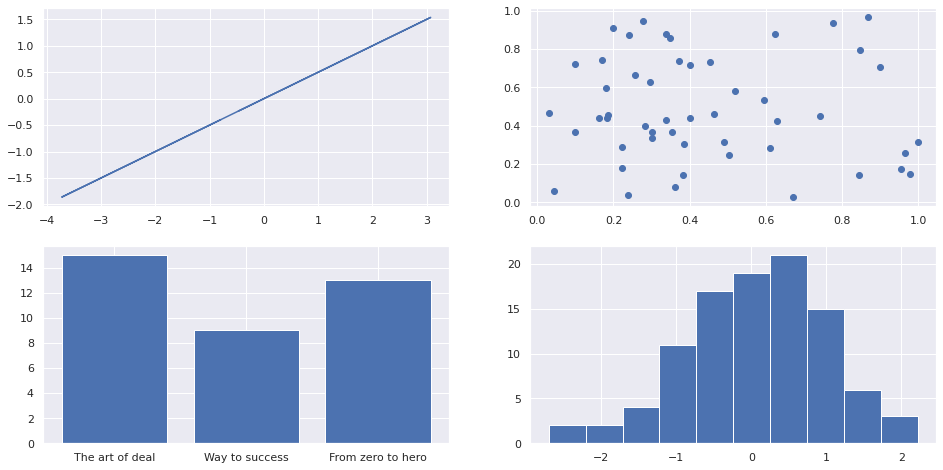

In [13]:
# option 1
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,8))
ax1.plot(x,x/2)
ax2.scatter(np.random.random(50),np.random.random(50))
ax3.bar(books_prices.keys(), books_prices.values())
ax4.hist(np.random.randn(100))

(array([ 6., 10., 17., 22., 13., 15.,  8.,  4.,  3.,  2.]),
 array([-1.95047320e+00, -1.46272608e+00, -9.74978946e-01, -4.87231818e-01,
         5.15310818e-04,  4.88262439e-01,  9.76009568e-01,  1.46375670e+00,
         1.95150383e+00,  2.43925095e+00,  2.92699808e+00]),
 <BarContainer object of 10 artists>)

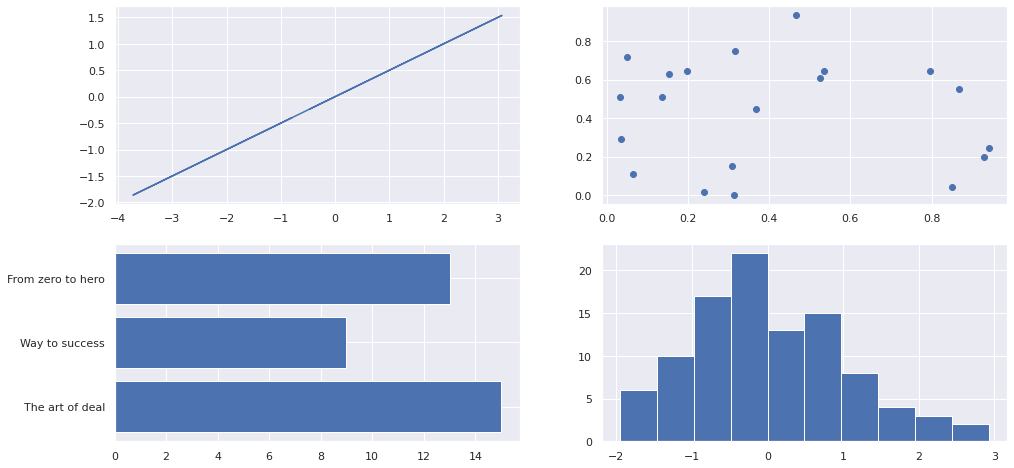

In [14]:
# option 2
fig, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].plot(x,x/2)
ax[0,1].scatter(np.random.random(20), np.random.random(20))
ax[1,0].barh(list(books_prices.keys()), list(books_prices.values())) 
ax[1,1].hist(np.random.randn(100))

## Ploting from pandas


In [15]:
car_sales = pd.read_csv("../data/car-sales.csv")

In [16]:
car_sales["Price"] = car_sales["Price"].str.replace("\D", "", regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [17]:
# remove 2 last zeros 
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [18]:
car_sales["Sale Date"] = pd.date_range("11/1/2020", periods=len(car_sales))

In [19]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-11-01,4000
1,Honda,Red,87899,4,5000,2020-11-02,9000
2,Toyota,Blue,32549,3,7000,2020-11-03,16000
3,BMW,Black,11179,5,22000,2020-11-04,38000
4,Nissan,White,213095,4,3500,2020-11-05,41500
5,Toyota,Green,99213,4,4500,2020-11-06,46000
6,Honda,Blue,45698,4,7500,2020-11-07,53500
7,Honda,Blue,54738,4,7000,2020-11-08,60500
8,Toyota,White,60000,4,6250,2020-11-09,66750
9,Nissan,White,31600,4,9700,2020-11-10,76450


/home/mvt/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Total Sales'>

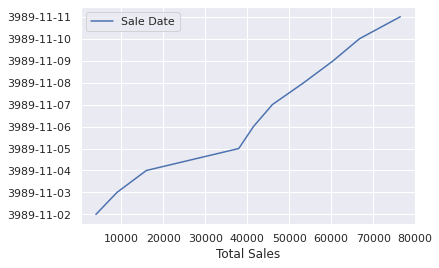

In [20]:
# Let's plot total sales
car_sales.plot(x="Total Sales", y="Sale Date")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

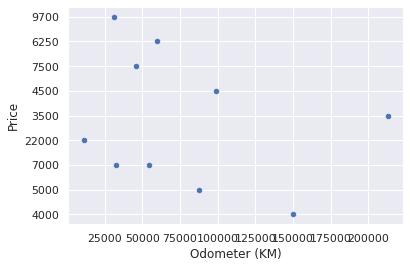

In [21]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

<AxesSubplot:xlabel='Make'>

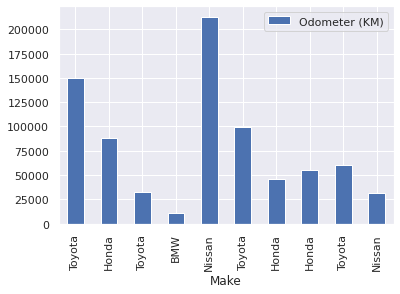

In [22]:
car_sales.plot(x="Make", y="Odometer (KM)",kind="bar")

<AxesSubplot:ylabel='Frequency'>

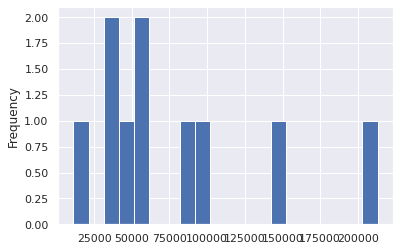

In [23]:
# How about histogram?
# car_sales["Odometer (KM)"].plot.hist()
car_sales["Odometer (KM)"].plot(kind="hist", bins=20)

In [24]:
x = np.random.rand(10,4)
x

array([[0.57950781, 0.42247096, 0.89843878, 0.84582549],
       [0.29461535, 0.90842442, 0.79453411, 0.80658016],
       [0.73604297, 0.17301182, 0.37543208, 0.91060292],
       [0.08166767, 0.26165069, 0.43749518, 0.99840398],
       [0.66160847, 0.67941386, 0.40221293, 0.45662339],
       [0.63283553, 0.1203222 , 0.23123821, 0.97475715],
       [0.91120861, 0.99456616, 0.00156564, 0.68938727],
       [0.47523593, 0.53064418, 0.72982034, 0.02067074],
       [0.16304506, 0.49112823, 0.60729567, 0.83014964],
       [0.37476372, 0.49284115, 0.75725819, 0.32038488]])

In [25]:
df = pd.DataFrame(x,columns=list("abcd"))

<AxesSubplot:>

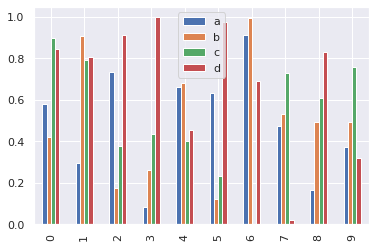

In [26]:
df.plot.bar()

<AxesSubplot:>

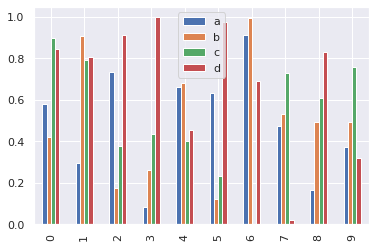

In [27]:
df.plot(kind="bar")

<AxesSubplot:>

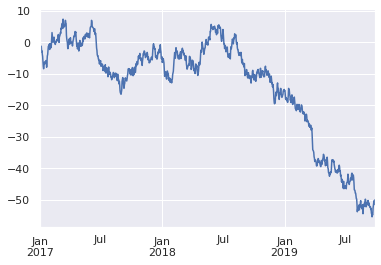

In [28]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2017", periods=1000))
ts.cumsum().plot()

## Example

### Hearth Disease

In [29]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

In [30]:
heart_disease.size, heart_disease.shape

(4242, (303, 14))

In [31]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

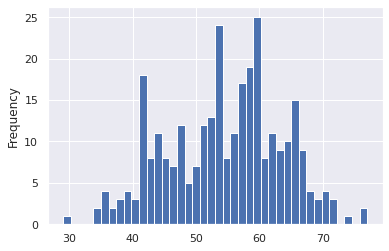

In [32]:
# Histogram of age
heart_disease["age"].plot.hist(bins=40)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

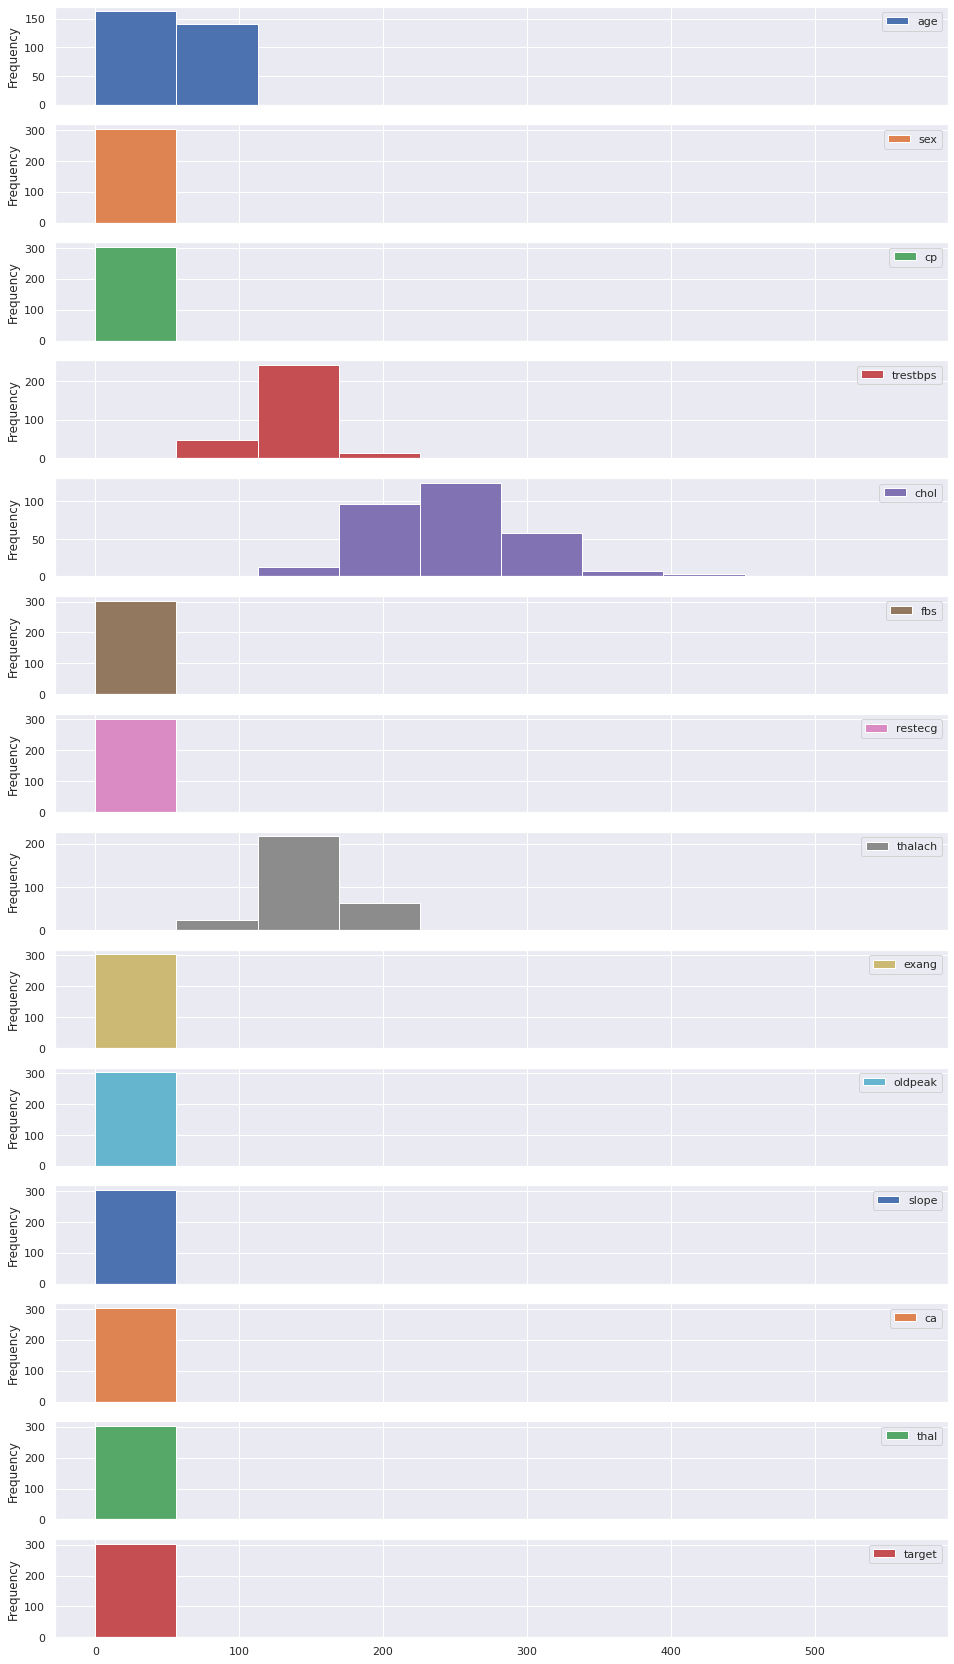

In [33]:
heart_disease.plot.hist(subplots=True, figsize=(16,30))

## Which one should pick up? (pyplot or matplotlib OO method) 
    * When plotting something quickly, use pyplot method
    * When plotting something more advanced, use matplotlib

In [34]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


<AxesSubplot:ylabel='Number'>

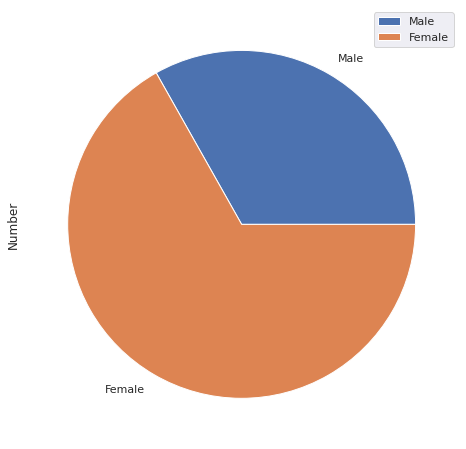

In [35]:
# Gender rate
fig, ax = plt.subplots(figsize=(8,8))

over_50_female = np.sum(over_50["sex"])
over_50_male = len(over_50) - over_50_female
df_gender_rate = pd.DataFrame([over_50_male,over_50_female], columns=["Number"],index=["Male","Female"] )
df_gender_rate.plot.pie(y="Number",ax=ax)


[Text(0.5, 1.0, 'Age and Chol'),
 Text(0.5, 0, 'age'),
 Text(0, 0.5, 'Chol'),
 (50.0, 80.0),
 (100.0, 400.0)]

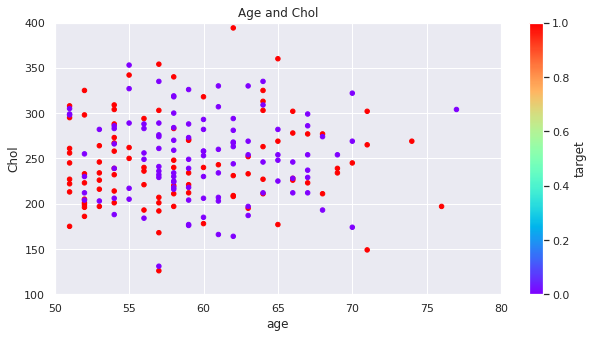

In [36]:
# OOP method mixed with pyplot
fig, ax = plt.subplots(figsize=(10,5))
over_50.plot(x="age", y="chol",c="target", kind="scatter",cmap="rainbow", ax=ax)
ax.set(title="Age and Chol",xlabel="age",ylabel="Chol",xlim=[50,80],ylim=[100,400])

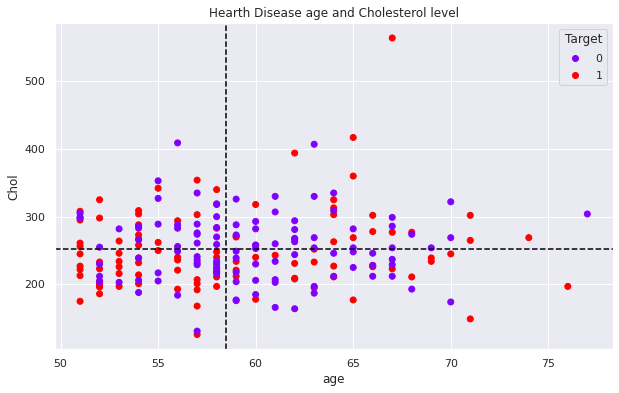

In [37]:
# OOP method from scatch
fig , ax = plt.subplots(figsize=(10,6))

# Plot data
scatter = ax.scatter(x=over_50["age"],y=over_50["chol"],c=over_50["target"],cmap="rainbow")

# Customize the plot
ax.set(title="Hearth Disease age and Cholesterol level", xlabel="age", ylabel="Chol")
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line 
ax.axhline(over_50["chol"].mean(), linestyle="--", color="black")

# Add a vertical line
ax.axvline(over_50["age"].median(), linestyle="--", color="black")

Text(0.5, 0.98, 'Hearth Disease Analysis')

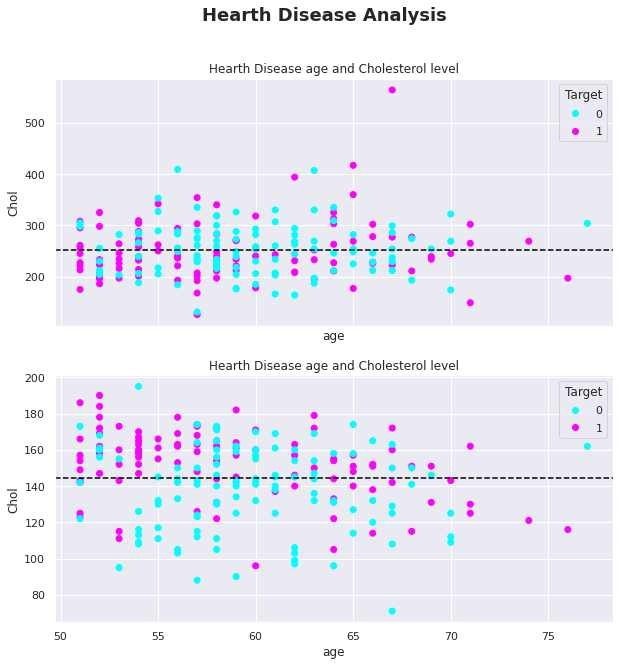

In [38]:
# Subplots of chol, age , thalach
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(10,10),sharex=True)

# Add data to ax0
scatter = ax0.scatter(over_50["age"],over_50["chol"],c=over_50["target"],cmap="cool")
# Customize ax0
ax0.set(title="Hearth Disease age and Cholesterol level", xlabel="age", ylabel="Chol")
ax0.legend(*scatter.legend_elements(),title="Target")
# Add horizontal line to ax0
ax0.axhline(over_50["chol"].mean(), linestyle="--", color="black")

# Add data to ax0
scatter = ax1.scatter(over_50["age"],over_50["thalach"],c=over_50["target"],cmap="cool")
# Customize ax0
ax1.set(title="Hearth Disease age and Cholesterol level", xlabel="age", ylabel="Chol")
ax1.legend(*scatter.legend_elements(),title="Target")
# Add horizontal line to ax0
ax1.axhline(over_50["thalach"].mean(), linestyle="--", color="black")

# Add a title to figure
fig.suptitle("Hearth Disease Analysis", fontsize=18, fontweight="bold")

In [39]:
# save image
fig.savefig("../images/hearth-disease-save.png")

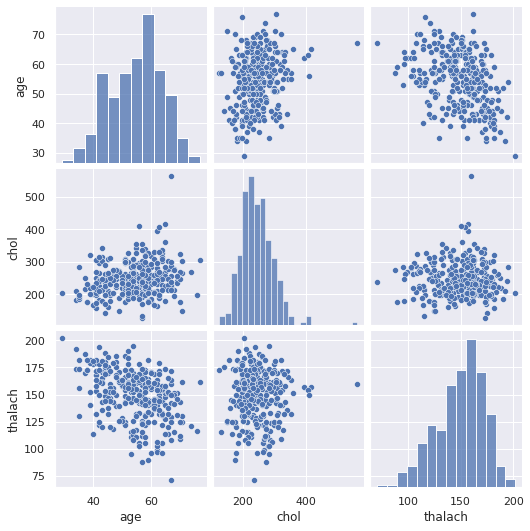

In [45]:
# pairplot by seaborn
sns.pairplot(heart_disease[["age","chol","thalach"]])


### Matrix random

In [49]:
df = pd.DataFrame(np.random.randn(10,4),columns=list("abcd"))
df

,a,b,c,d
0,-0.368945,-1.341229,-0.004248,1.641200
1,-0.876922,0.805545,2.230408,0.884040
2,0.156678,-0.306678,-1.405995,0.114937
3,0.135307,0.967865,0.520401,1.560233
4,-0.391142,-0.625321,-0.410207,1.387175
5,-2.322887,-3.077518,0.814327,-2.236929
6,0.681028,-0.354935,-0.408203,-0.146957
7,-0.958161,-0.117824,-1.807673,-0.589770
8,-1.042003,-1.016161,0.122031,-0.515289
9,-0.427766,0.530415,0.501250,-0.136536


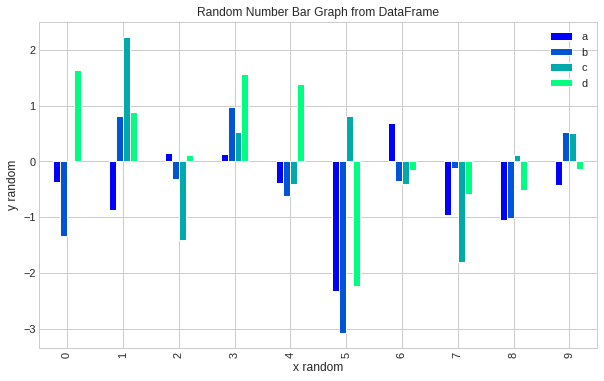

In [50]:
plt.style.use("seaborn-whitegrid")
fig , ax = plt.subplots(figsize=(10,6))
df.plot(kind="bar", cmap="winter", ax=ax)
# Customize bar plot with set method
ax.set(title="Random Number Bar Graph from DataFrame", xlabel="x random" , ylabel="y random")
ax.legend().set_visible(True)

### Pie Chart

array([<AxesSubplot:ylabel='mass'>], dtype=object)

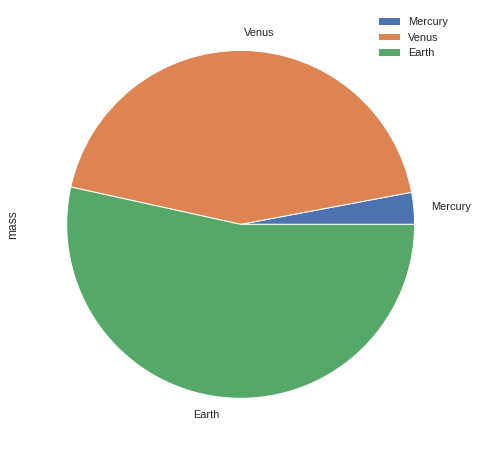

In [48]:
df = pd.DataFrame({"mass" : [0.330, 4.87 , 5.97], 'radius': [2439.7, 6051.8, 6378.1]}, index=['Mercury', 'Venus', 'Earth'])
df.plot.pie(y="mass", subplots=True, figsize=(8,8))